<hr>

# Problem #2

In [1]:
import pandas as pd
import lazypredict

from lazypredict.Supervised import LazyRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from ucimlrepo import fetch_ucirepo

student_performance = fetch_ucirepo(id=320)

X_import = student_performance.data.features
y_import = student_performance.data.targets
X_import


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


In [3]:
X = pd.concat([X_import, y_import.iloc[:, :-1]], axis=1)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,6,10,10


In [4]:
y = y_import.iloc[:, -1]
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [5]:
le = LabelEncoder()
X = pd.DataFrame(X)
X = X.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rgsr = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = rgsr.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [00:09<00:00,  4.96it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 32
[LightGBM] [Info] Start training from score 11.793834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 42/42 [00:09<00:00,  4.33it/s]


In [6]:
print(models)


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.76       0.82  1.33        0.33
RandomForestRegressor                        0.74       0.80  1.38        0.65
XGBRegressor                                 0.72       0.79  1.43        0.29
ExtraTreesRegressor                          0.71       0.78  1.46        0.95
BaggingRegressor                             0.71       0.78  1.47        0.08
HistGradientBoostingRegressor                0.69       0.77  1.50        1.43
LGBMRegressor                                0.68       0.76  1.54        0.26
AdaBoostRegressor                            0.59       0.69  1.73        0.21
DecisionTreeRegressor                        0.28       0.46  2.29        0.02
ExtraTreeRegressor                           0.24       0.43  2.37        0.09
NuSVR                                        0.02   

In [7]:
best_model_name = models.sort_values('R-Squared', ascending=False).index[0]

feature_names = X.columns
X_df = pd.DataFrame(X_test, columns=feature_names)
best_model = rgsr.models[best_model_name]
best_model



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')),
                                                 ('categorical_low',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Int64Index([], dtype='int64')),
                                                 ('categorical_high',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  Int64Index([], dtype='int64'))])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

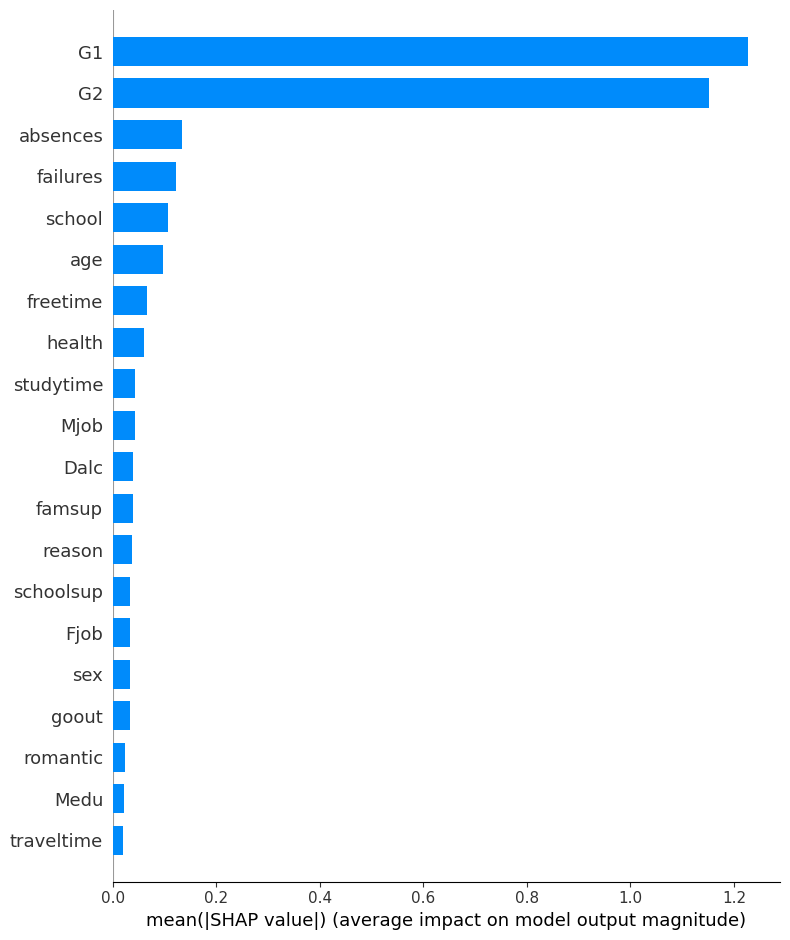

In [8]:

import shap
explainer = shap.TreeExplainer(best_model.named_steps['regressor'])
shap_values = explainer(X_df)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Summary
* According to the plot the most influencial features are G1 and G2 which are expected because these are grades from the previous periods.
* This only means that these past grades are really a high predictor of the G3 grade.
* Another is the absences. This suggest that absences directly impact the performance of the G3 of the students.
* Other factors like traveltime, Medu, romantic, and goout, are not very indicative of the performance of the students. 